In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

from scipy.stats import pearsonr

%matplotlib inline

In [2]:
expDF = pd.read_csv('data/BehaviorSpace/phase_03/phase_03.csv')

expDF.rename(columns={'(list (report-crimes-per-hour) (total-crimes))': 'results', 
                      '[step]':'step', '[run number]':'run_number'}, inplace=True)

In [3]:
# Getting the total of robberies
total_robberies_temp = expDF.results.str.split(']', expand=True)
# Converting all values to int and adding to the DF
expDF['num_crimes'] = total_robberies_temp[1].str.strip().astype(int)

In [4]:
# Convert the crimes distribution vector to a python list
expDF['crimes_dist'] = [list(map(int, i.split(' '))) for i in total_robberies_temp[0].str.split('[', expand=True)[2]]
# Delete the column results
expDF.drop(['results'], axis=1, inplace=True)

In [5]:
expDF.head(2)

,run_number,awareness-sf,motivation-sf,motivation-threshold,num-offenders,num-people,graphics-view,step,num_crimes,crimes_dist
0,1,0.8,0.04,0.9,20,10000,False,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,0.8,0.04,0.9,20,10000,False,1,3,"[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [6]:
# Get only the final step of the simulation
expDF_Final = expDF[expDF.step == max(expDF.step)]

In [7]:
expDF_Final.reset_index(drop=True, inplace=True)

In [8]:
expDF_Final

,run_number,awareness-sf,motivation-sf,motivation-threshold,num-offenders,num-people,graphics-view,step,num_crimes,crimes_dist
0,3,0.8,0.04,0.9,20,10000,False,52703,679,"[61, 43, 22, 22, 40, 25, 24, 8, 6, 1, 0, 1, 5,..."
1,4,0.8,0.04,0.9,20,10000,False,52703,677,"[50, 35, 23, 27, 40, 31, 14, 6, 3, 1, 0, 2, 8,..."
2,5,0.8,0.04,0.9,20,10000,False,52703,674,"[44, 31, 22, 23, 31, 33, 21, 11, 2, 0, 1, 1, 7..."
3,7,0.8,0.04,0.9,20,10000,False,52703,675,"[44, 43, 26, 19, 50, 29, 15, 11, 3, 0, 0, 1, 8..."
4,6,0.8,0.04,0.9,20,10000,False,52703,682,"[55, 40, 18, 32, 47, 34, 22, 9, 3, 0, 0, 0, 6,..."
5,2,0.8,0.04,0.9,20,10000,False,52703,680,"[48, 45, 24, 18, 38, 38, 26, 9, 3, 2, 0, 1, 7,..."
6,8,0.8,0.04,0.9,20,10000,False,52703,678,"[47, 40, 23, 25, 41, 32, 19, 5, 2, 3, 0, 0, 5,..."
7,1,0.8,0.04,0.9,20,10000,False,52703,680,"[55, 45, 20, 16, 42, 38, 20, 7, 4, 1, 0, 2, 4,..."
8,10,0.8,0.04,0.9,20,10000,False,52703,683,"[59, 37, 30, 21, 35, 39, 23, 14, 3, 0, 1, 0, 4..."
9,9,0.8,0.04,0.9,20,10000,False,52703,679,"[49, 31, 22, 19, 46, 30, 18, 12, 3, 1, 0, 1, 7..."


In [1]:
#empData = [13, 13, 19, 19, 9, 9, 2, 2, 1, 1, 3, 3, 5, 5, 4, 4, 4, 4, 9, 9, 25, 25, 19, 19]
empData = [7, 6, 13, 6, 2, 7, 2, 0, 0, 1, 0, 3, 3, 2, 3, 1, 3, 1, 3, 6, 12, 13, 8, 11]

In [10]:
corr, p_value = pearsonr(empData, expDF_Final.crimes_dist[0])
corr, p_value

(0.7082429156131935, 0.00010773742372185363)

Text(0, 0.5, 'Simulated Data')

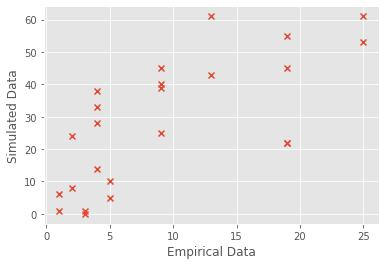

In [11]:
plt.scatter(empData, expDF_Final.crimes_dist[0], marker='x')
plt.xlabel('Empirical Data')
plt.ylabel('Simulated Data')

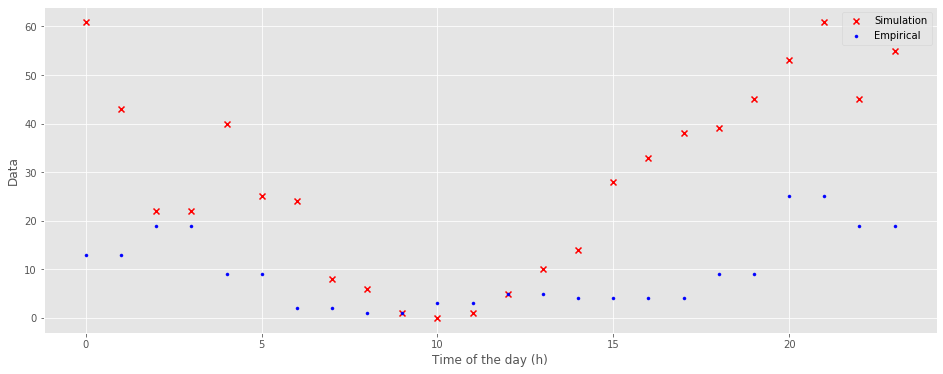

In [12]:
x = range(0,24)
plt.figure(figsize=((16,6)))
plt.scatter(x, expDF_Final.crimes_dist[0], marker='x', c='red', label='Simulation')
plt.xlabel('Time of the day (h)')
plt.ylabel('Data')
plt.scatter(x, empData, marker='.', c='blue', label='Empirical')
plt.legend()


In [13]:
expDF_Final['corr'] = [pearsonr(empData, row['crimes_dist'])[0] 
                       for index, row in expDF_Final.iterrows() ]
expDF_Final['p_value'] = [pearsonr(empData, row['crimes_dist'])[1] 
                          for index, row in expDF_Final.iterrows() ]

/Users/eric/Documents/CrimAI/code/Python/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/eric/Documents/CrimAI/code/Python/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
expDF_Final[['crimes_dist','corr', 'p_value']]

,crimes_dist,corr,p_value
0,"[61, 43, 22, 22, 40, 25, 24, 8, 6, 1, 0, 1, 5,...",0.708243,0.000108
1,"[50, 35, 23, 27, 40, 31, 14, 6, 3, 1, 0, 2, 8,...",0.749142,0.000025
2,"[44, 31, 22, 23, 31, 33, 21, 11, 2, 0, 1, 1, 7...",0.788014,0.000005
3,"[44, 43, 26, 19, 50, 29, 15, 11, 3, 0, 0, 1, 8...",0.695928,0.000159
4,"[55, 40, 18, 32, 47, 34, 22, 9, 3, 0, 0, 0, 6,...",0.687842,0.000204
5,"[48, 45, 24, 18, 38, 38, 26, 9, 3, 2, 0, 1, 7,...",0.641001,0.000738
6,"[47, 40, 23, 25, 41, 32, 19, 5, 2, 3, 0, 0, 5,...",0.728600,0.000054
7,"[55, 45, 20, 16, 42, 38, 20, 7, 4, 1, 0, 2, 4,...",0.702920,0.000128
8,"[59, 37, 30, 21, 35, 39, 23, 14, 3, 0, 1, 0, 4...",0.664353,0.000399
9,"[49, 31, 22, 19, 46, 30, 18, 12, 3, 1, 0, 1, 7...",0.667640,0.000365


In [15]:
list(expDF_Final[expDF_Final.p_value < 0.1].crimes_dist)

[[61,
  43,
  22,
  22,
  40,
  25,
  24,
  8,
  6,
  1,
  0,
  1,
  5,
  10,
  14,
  28,
  33,
  38,
  39,
  45,
  53,
  61,
  45,
  55],
 [50,
  35,
  23,
  27,
  40,
  31,
  14,
  6,
  3,
  1,
  0,
  2,
  8,
  14,
  17,
  27,
  29,
  34,
  57,
  42,
  58,
  55,
  54,
  50],
 [44,
  31,
  22,
  23,
  31,
  33,
  21,
  11,
  2,
  0,
  1,
  1,
  7,
  16,
  18,
  19,
  31,
  32,
  40,
  45,
  56,
  68,
  59,
  63],
 [44,
  43,
  26,
  19,
  50,
  29,
  15,
  11,
  3,
  0,
  0,
  1,
  8,
  9,
  14,
  25,
  36,
  38,
  42,
  47,
  39,
  72,
  53,
  51],
 [55,
  40,
  18,
  32,
  47,
  34,
  22,
  9,
  3,
  0,
  0,
  0,
  6,
  12,
  15,
  16,
  39,
  43,
  39,
  48,
  49,
  57,
  48,
  50],
 [48,
  45,
  24,
  18,
  38,
  38,
  26,
  9,
  3,
  2,
  0,
  1,
  7,
  7,
  17,
  17,
  24,
  37,
  58,
  62,
  48,
  57,
  51,
  43],
 [47,
  40,
  23,
  25,
  41,
  32,
  19,
  5,
  2,
  3,
  0,
  0,
  5,
  10,
  15,
  28,
  28,
  38,
  49,
  46,
  43,
  80,
  52,
  47],
 [55,
  45,
  20,
  16,
  4

In [16]:
expDF_Final[expDF_Final.p_value < 0.05]

,run_number,awareness-sf,motivation-sf,motivation-threshold,num-offenders,num-people,graphics-view,step,num_crimes,crimes_dist,corr,p_value
0,3,0.8,0.04,0.9,20,10000,False,52703,679,"[61, 43, 22, 22, 40, 25, 24, 8, 6, 1, 0, 1, 5,...",0.708243,0.000108
1,4,0.8,0.04,0.9,20,10000,False,52703,677,"[50, 35, 23, 27, 40, 31, 14, 6, 3, 1, 0, 2, 8,...",0.749142,0.000025
2,5,0.8,0.04,0.9,20,10000,False,52703,674,"[44, 31, 22, 23, 31, 33, 21, 11, 2, 0, 1, 1, 7...",0.788014,0.000005
3,7,0.8,0.04,0.9,20,10000,False,52703,675,"[44, 43, 26, 19, 50, 29, 15, 11, 3, 0, 0, 1, 8...",0.695928,0.000159
4,6,0.8,0.04,0.9,20,10000,False,52703,682,"[55, 40, 18, 32, 47, 34, 22, 9, 3, 0, 0, 0, 6,...",0.687842,0.000204
5,2,0.8,0.04,0.9,20,10000,False,52703,680,"[48, 45, 24, 18, 38, 38, 26, 9, 3, 2, 0, 1, 7,...",0.641001,0.000738
6,8,0.8,0.04,0.9,20,10000,False,52703,678,"[47, 40, 23, 25, 41, 32, 19, 5, 2, 3, 0, 0, 5,...",0.728600,0.000054
7,1,0.8,0.04,0.9,20,10000,False,52703,680,"[55, 45, 20, 16, 42, 38, 20, 7, 4, 1, 0, 2, 4,...",0.702920,0.000128
8,10,0.8,0.04,0.9,20,10000,False,52703,683,"[59, 37, 30, 21, 35, 39, 23, 14, 3, 0, 1, 0, 4...",0.664353,0.000399
9,9,0.8,0.04,0.9,20,10000,False,52703,679,"[49, 31, 22, 19, 46, 30, 18, 12, 3, 1, 0, 1, 7...",0.667640,0.000365


In [17]:
results_list = np.array(expDF_Final.crimes_dist)
results_list = [np.asarray(i) for i in results_list]
results_df = pd.DataFrame(results_list)
results_df.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,61,43,22,22,40,25,24,8,6,1,...,14,28,33,38,39,45,53,61,45,55
1,50,35,23,27,40,31,14,6,3,1,...,17,27,29,34,57,42,58,55,54,50
2,44,31,22,23,31,33,21,11,2,0,...,18,19,31,32,40,45,56,68,59,63
3,44,43,26,19,50,29,15,11,3,0,...,14,25,36,38,42,47,39,72,53,51
4,55,40,18,32,47,34,22,9,3,0,...,15,16,39,43,39,48,49,57,48,50


In [18]:
mean_results = list(results_df.mean())

In [19]:
pearsonr(empData, mean_results)

(0.7248497642068226, 6.165230006561659e-05)